In [1]:
import numpy as np
import matplotlib.pyplot as plt

**1. Solving Linear Equation**

In [2]:
matrix_x = [
    [
        [8, -2, 3],
        [-1, 10, -2],
        [2, 1, 9]
    ],
    [
        [6, 1, -1],
        [1, 7, 2],
        [-1, 2, 8]
    ],
    [
        [7, -2, 1],
        [1, 8, -2],
        [2, 1, 9]
    ],
    [
        [10, 1, 1],
        [1, 11, -1],
        [1, -1, 12]
    ],
    [
        [2, -4, 1],
        [3, 2, -5],
        [-4, 6, 2]
    ],
    [
        [-3, 1, -4],
        [1, -2, 5],
        [2, 3, -1]
    ],
    [
        [1, 2, -3],
        [1, 8, -2],
        [7, -8, 9]
    ],
    [
        [3, -1, 4],
        [1, 2, -5],
        [2, -3, 1]
    ]
]


matrix_y = [
    [10,15,25],
    [8,14,20],
    [9,10,11],
    [12,14,16],
    [-3,7,1],
    [-6,7,8],
    [5, -8,10],
    [5,3,7]
]


In [3]:
matrix_x = np.array(matrix_x)
matrix_y = np.array(matrix_y)

In [4]:
def check_diag(matrix):
    diag = np.diag(np.abs(matrix))
    not_diag = np.sum(np.abs(matrix), axis = 1) - diag
    if(np.all(diag > not_diag)):
        return True
    return print("Not Diagonally Dominant, Thus not convergent.")

In [5]:
def gauss_seidel(matrix_x, matrix_y, eps = 0.091, iter = 25):
    diag = np.diag(matrix_x)
    matrix_x = -matrix_x
    np.fill_diagonal(matrix_x, 0)
    
    init_value = np.zeros(np.shape(matrix_x[0]))
    
    for i in range(iter):
        new_value = np.array(init_value)
        
        for j, row in enumerate(matrix_x):
            new_value[j] = (matrix_y[j] + np.dot(row, new_value)) / diag[j]
            
        print(f'Iteration {i+1}: ', new_value)
        euclid_dist = np.sqrt(np.dot(new_value-init_value, new_value-init_value))
        
        if euclid_dist < eps:
            print('Convergent!')
            return
        
        init_value = new_value

In [6]:
for i, (matrix_x, matrix_y) in enumerate(zip(matrix_x, matrix_y)):
    print(f'Matrix {i+1}')
    if check_diag(matrix_x):
        gauss_seidel(matrix_x, matrix_y)

Matrix 1
Iteration 1:  [1.25       1.625      2.31944444]
Iteration 2:  [0.78645833 2.04253472 2.37606096]
Iteration 3:  [0.86961082 2.06217327 2.35540056]
Convergent!
Matrix 2
Iteration 1:  [1.33333333 1.80952381 2.21428571]
Iteration 2:  [1.40079365 1.16723356 2.38329082]
Iteration 3:  [1.53600954 1.09962983 2.41709373]
Iteration 4:  [1.55291065 1.08755741 2.42222448]
Convergent!
Matrix 3
Iteration 1:  [1.28571429 1.08928571 0.81547619]
Iteration 2:  [1.48044218 1.26881378 0.75225576]
Iteration 3:  [1.5407674  1.24546802 0.74144413]
Convergent!
Matrix 4
Iteration 1:  [1.2        1.16363636 1.33030303]
Iteration 2:  [0.95060606 1.30724518 1.36305326]
Iteration 3:  [0.93297016 1.31182574 1.36490463]
Convergent!
Matrix 5
Not Diagonally Dominant, Thus not convergent.
Matrix 6
Not Diagonally Dominant, Thus not convergent.
Matrix 7
Not Diagonally Dominant, Thus not convergent.
Matrix 8
Not Diagonally Dominant, Thus not convergent.


**2. Regression and Plotting**

In [7]:
x = np.array([0.0, 0.01265823, 0.02531646, 0.03797468, 0.05063291, 0.06329114,
0.07594937, 0.08860759, 0.10126582, 0.11392405, 0.12658228, 0.13924051,
0.15189873, 0.16455696, 0.17721519, 0.18987342, 0.20253165, 0.21518987,
0.2278481, 0.24050633, 0.25316456, 0.26582278, 0.27848101, 0.29113924,
0.30379747, 0.3164557, 0.32911392, 0.34177215, 0.35443038, 0.36708861,
0.37974684, 0.39240506, 0.40506329, 0.41772152, 0.43037975, 0.44303797,
0.4556962, 0.46835443, 0.48101266, 0.49367089, 0.50632911, 0.51898734,
0.53164557, 0.5443038, 0.55696203, 0.56962025, 0.58227848, 0.59493671,
0.60759494, 0.62025316, 0.63291139, 0.64556962, 0.65822785, 0.67088608,
0.6835443, 0.69620253, 0.70886076, 0.72151899, 0.73417722, 0.74683544,
0.75949367, 0.7721519, 0.78481013, 0.79746835, 0.81012658, 0.82278481,
0.83544304, 0.84810127, 0.86075949, 0.87341772, 0.88607595, 0.89873418,
0.91139241, 0.92405063, 0.93670886, 0.94936709, 0.96202532, 0.97468354,
0.98734177, 1.0])

y = np.array([2.09271945, 2.20028729, 2.25065766, 2.19974036, 2.18315491, 2.23194821,
2.16162725, 2.32693546, 2.27891101, 2.11751791, 2.1817317, 2.35680097,
2.20811778, 2.25274117, 2.4370985, 2.27372116, 2.37711196, 2.3783529,
2.43531517, 2.53773363, 2.36819891, 2.53666574, 2.36994729, 2.32868594,
2.57598781, 2.48459811, 2.4316247, 2.43237323, 2.39305619, 2.54415464,
2.44582352, 2.40166229, 2.67429708, 2.50764819, 2.61786442, 2.73820088,
2.62334732, 2.49238012, 2.64213359, 2.75184226, 2.5395776, 2.78986665,
2.64306456, 2.7631048, 2.85332376, 2.58884493, 2.59020845, 2.76524818,
2.81706237, 2.69608111, 2.802584, 2.82130965, 2.69087715, 2.86650847,
2.70441594, 2.80210609, 2.84531659, 2.72979077, 2.89120147, 2.87813038,
2.8630733, 2.91861252, 3.07955386, 2.83050749, 3.00522466, 2.96149855,
2.97810712, 3.13775419, 2.86423362, 3.05292434, 3.1226691, 3.14746303,
3.15208506, 3.16016772, 3.14045025, 3.00421247, 3.0136957, 3.116399,
3.21368012, 3.05797481])

In [8]:
A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]

In [9]:
first = np.linalg.inv(np.dot(A.T, A))
second = np.dot(first, A.T)
result = np.dot(second, y)

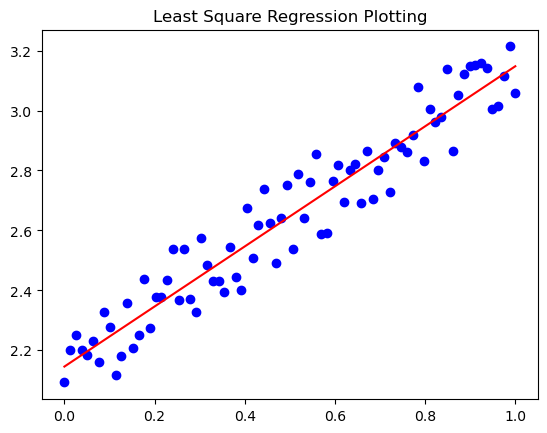

m:  [1.00195022]
c:  [2.14579522]


In [10]:
plt.plot(x, y,'bo')
plt.plot(x, result[0]*x + result[1], 'r-')
plt.title('Least Square Regression Plotting')
plt.show()

print('m: ', result[0])
print('c: ', result[1])

**3. Newton Rapshon**

In [11]:
def f(x):
    return 3*x**4 + 2*x**3 - 6*x**2 + 2

In [12]:
def g(x):
    return 12*x**3 + 6*x**2 - 12*x

In [13]:
def newton_rapshon(x, tolerance = 0.091, iter = 30):
    for i in range(iter):
        x = x - f(x) / g(x)
        print(f'Iteration {i+1}: new root = ', x)
        
        if np.abs(f(x)) < tolerance:
            print('The root of equation is: ', x)
            return

In [14]:
newton_rapshon(5)

Iteration 1: new root =  3.7566037735849056
Iteration 2: new root =  2.837918072491105
Iteration 3: new root =  2.1656374969740533
Iteration 4: new root =  1.680596169391979
Iteration 5: new root =  1.3367387497569794
Iteration 6: new root =  1.0953567670378621
Iteration 7: new root =  0.9174256487584835
Iteration 8: new root =  0.7300792263283812
Iteration 9: new root =  1.2143415066243524
Iteration 10: new root =  1.0077190097872157
Iteration 11: new root =  0.8409471038429874
Iteration 12: new root =  0.4942695005212419
Iteration 13: new root =  0.8107850396696739
Iteration 14: new root =  0.12603041628613343
Iteration 15: new root =  1.4967426854528965
Iteration 16: new root =  1.2077871366605257
Iteration 17: new root =  1.0029304385525257
Iteration 18: new root =  0.836248251644105
Iteration 19: new root =  0.46216966273990084
Iteration 20: new root =  0.8039817829168439
Iteration 21: new root =  -0.08408538109980601
Iteration 22: new root =  -1.957603884901435
Iteration 23: new 

**4. Integral Riemman**

In [15]:
def f(x):
    return 4*x**3 + 6*x**2 - 4*x + 5

In [16]:
start = -3
end = 8
interval = 2400
h = (end - start) / (interval - 1)
points = np.linspace(start, end, interval)

midRiemman = h * np.sum(
    f((points[:-1] + points[1:]) / 2)
)

trapezoid = h/2 * np.sum(
    f(points[0]) + f(points[-1])
) + 2 * np.sum(f(points[1:-1]))

In [17]:
print('Mid Riemman: ', midRiemman)
print('Trapezoid: ', trapezoid)

Mid Riemman:  5037.999306192782
Trapezoid:  2195122.0341809085
